# Linear Regression

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity. 

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import mglearn
from matplotlib import pyplot as plt

In [12]:
X,y=mglearn.datasets.make_wave(n_samples=60)

# Split the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [13]:
lr=LinearRegression()

#fit the data into model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute:


In [14]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.44153666]
lr.intercept_: -0.01711124414733381


In [15]:
print('Training Score: {:.2f}'.format(lr.score(X_train,y_train)))
print('Test Score: {:.2f}'.format(lr.score(X_test,y_test)))

Training Score: 0.66
Test Score: 0.69


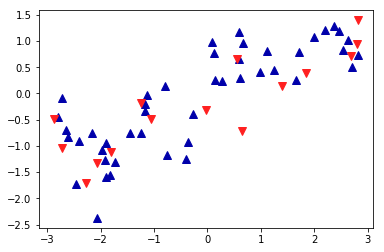

In [16]:
plt.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
plt.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)

# Linear Regression with Boston Housing Dataset

Remember that this dataset has 506 samples and 105 derived features. First, we load the dataset and split it into a training and a test set. 

In [17]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression()
#fit the data into thr model
lr.fit(X_train,y_train)

#Calculate score
print('Training Score: {}'.format(lr.score(X_train,y_train)))
print('Test Score: {}'.format(lr.score(X_test,y_test)))

Training Score: 0.9523526436864238
Test Score: 0.6057754892935845


This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is ridge regression, 

# Ridge Regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization

In [18]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(X_train,y_train)
print('Training Score: {:.2f}'.format(ridge.score(X_train,y_train)))
print('Test Score: {:.2f}'.format(ridge.score(X_test,y_test)))

Training Score: 0.89
Test Score: 0.75


As you can see, the training set score of Ridge is lower than for LinearRegression, while the test set score is higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.


In [19]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print('Training Score: {:.2f}'.format(ridge10.score(X_train,y_train)))
print('Test Score: {:.2f}'.format(ridge10.score(X_test,y_test)))

Training Score: 0.79
Test Score: 0.64


In [20]:
ridge01=Ridge(alpha=.1).fit(X_train,y_train)
print('Training Score: {:.2f}'.format(ridge01.score(X_train,y_train)))
print('Test Score: {:.2f}'.format(ridge01.score(X_test,y_test)))

Training Score: 0.93
Test Score: 0.77


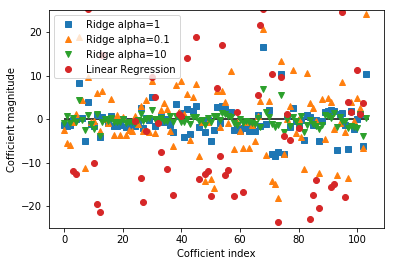

In [21]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge01.coef_,'^',label='Ridge alpha=0.1')
plt.plot(ridge10.coef_,'v',label='Ridge alpha=10')
plt.plot(lr.coef_,'o',label='Linear Regression')
plt.xlabel('Cofficient index')
plt.ylabel('Cofficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

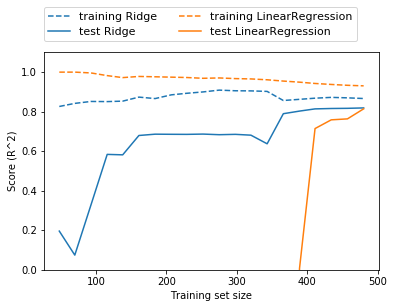

In [22]:
mglearn.plots.plot_ridge_n_samples()

# Lasso

An alternative to Ridge for regularization linear regression is lasso. As with ridge regression, using lasso also restricts coeficients to be close to zero but in a slightly different way, called L1 regularization.8 The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model. 

In [23]:
from sklearn.linear_model import Lasso
import numpy as np

In [24]:
lasso=Lasso().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_!=0)))
print('Total Number of features present : {}'.format(X_train.shape))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4
Total Number of features present : (379, 104)


Lasso uses 4/105 features. This indicates that we are underfitting.
Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. In the previous example, we used the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run):

In [25]:
# we increase the default setting of 'max_iter'
# otherwise the model would warn us that we should increase max_iter

lasso001=Lasso(alpha=0.01,max_iter=1000000).fit(X_train,y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_!=0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using Ridge, and we are using only 33 of the 105 features. This makes this model potentially easier to understand. If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression:

In [26]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train,y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso00001.coef_!=0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


Text(0,0.5,'Cofficient magnitude')

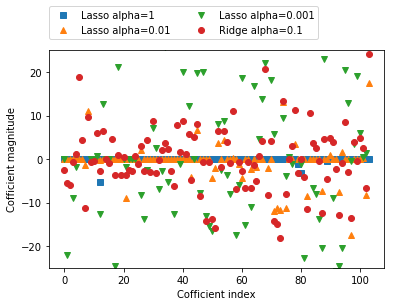

In [27]:
# Again, we can plot the coefficients of the different models
plt.plot(lasso.coef_,'s',label='Lasso alpha=1')
plt.plot(lasso001.coef_,'^',label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_,'v',label='Lasso alpha=0.001')

plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1')
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('Cofficient index')
plt.ylabel('Cofficient magnitude')